# Inspect sky metrics

In this notebook, I investigate sky metrics based on the file [lvm_per_fiber_sky_metrics_1.1.0.fits (5.5Gb)](https://data.sdss5.org/sas/sdsswork/lvm/sandbox/lvmsky_inspect/lvm_per_fiber_sky_metrics_1.1.0.fits), which containes several sky lines and continuum metric calculated per fiber from SFrame files. This file was assembled using the script [collect_fiber_metrics.py](https://github.com/sdss/lvmsky/blob/main/notebooks/collect_fiber_metrics.py) and contained metrics defined by following:

```
WLINES = [
    dict(name='OI_5577', wave=5577.34, line_region=[-3, 3], cont_regions=[[-7, -3], [3, 7]]),
    dict(name='Na_5893', wave=5893, line_region=[-7, 6], cont_regions=[[-11, -7], [6, 10]]),
    dict(name='OI_6300', wave=6300.3, line_region=[-3, 3], cont_regions=[[-8, -5], [10, 14]]),
    dict(name='OH_7341', wave=7340.75, line_region=[-3, 3], cont_regions=[[-7, -3], [3, 7]]),
    dict(name='O2_8650', wave=8650, line_region=[-42, 62], cont_regions=[[-48, -42], [62, 72]]),
]

WCONTS = [
    dict(name='Bcont', wave=4620, cont_regions=[[-20, 20]]),
    dict(name='Rcont', wave=6765, cont_regions=[[-15, 15]]),
    dict(name='Zcont', wave=9193, cont_regions=[[-15, 15]]),
]
```

For sky lines (`WLINES`), the region defining the line is specified by `wave` and `line_region` keys. For example, OI_5577 defined as region from 5577.34-3 to 5577.34+3. `cont_regions` defines two spectral ranges from left and right to estimate continuum level. For coninuum metrics defined by `WCONTS` only `cont_regions` key defines the regions to calculate continuum level. For details, see the script [collect_fiber_metrics.py](https://github.com/sdss/lvmsky/blob/main/notebooks/collect_fiber_metrics.py) and notebook [Which_sky_metrics_use.ipynb](https://github.com/sdss/lvmsky/blob/main/notebooks/Which_sky_metrics_use.ipynb).

## What are magnitude per fiber variations?

Check if there are remaining variations due to flat-fielding and/or throughput calibrations.

In [1]:
import os
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

In [3]:
t = Table.read("lvm_per_fiber_sky_metrics_1.1.0.fits")
t

exposure,mjd,tile_id,dpos,fiberid,spectrographid,blockid,finblock,targettype,ifulabel,finifu,telescope,fibstatus,ra,dec,s_OI_5577_sum,s_OI_5577_sumtrapz,s_OI_5577_mean,s_OI_5577_std,s_OI_5577_cont_median,s_OI_5577_cont_mean,c_OI_5577_sum,c_OI_5577_sumtrapz,c_OI_5577_mean,c_OI_5577_std,c_OI_5577_cont_median,c_OI_5577_cont_mean,s_Na_5893_sum,s_Na_5893_sumtrapz,s_Na_5893_mean,s_Na_5893_std,s_Na_5893_cont_median,s_Na_5893_cont_mean,c_Na_5893_sum,c_Na_5893_sumtrapz,c_Na_5893_mean,c_Na_5893_std,c_Na_5893_cont_median,c_Na_5893_cont_mean,s_OI_6300_sum,s_OI_6300_sumtrapz,s_OI_6300_mean,s_OI_6300_std,s_OI_6300_cont_median,s_OI_6300_cont_mean,c_OI_6300_sum,c_OI_6300_sumtrapz,c_OI_6300_mean,c_OI_6300_std,c_OI_6300_cont_median,c_OI_6300_cont_mean,s_OH_7341_sum,s_OH_7341_sumtrapz,s_OH_7341_mean,s_OH_7341_std,s_OH_7341_cont_median,s_OH_7341_cont_mean,c_OH_7341_sum,c_OH_7341_sumtrapz,c_OH_7341_mean,c_OH_7341_std,c_OH_7341_cont_median,c_OH_7341_cont_mean,s_O2_8650_sum,s_O2_8650_sumtrapz,s_O2_8650_mean,s_O2_8650_std,s_O2_8650_cont_median,s_O2_8650_cont_mean,c_O2_8650_sum,c_O2_8650_sumtrapz,c_O2_8650_mean,c_O2_8650_std,c_O2_8650_cont_median,c_O2_8650_cont_mean,s_Bcont_median,s_Bcont_mean,s_Bcont_std,c_Bcont_median,c_Bcont_mean,c_Bcont_std,s_Rcont_median,s_Rcont_mean,s_Rcont_std,c_Rcont_median,c_Rcont_mean,c_Rcont_std,s_Zcont_median,s_Zcont_mean,s_Zcont_std,c_Zcont_median,c_Zcont_mean,c_Zcont_std
int64,int64,int64,int64,int64,int64,bytes3,int64,bytes8,bytes5,int64,bytes4,int64,float64,float64,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
7325,60255,1029275,0,1,1,B1,1,SKY,SkyW3,1,SkyW,0,76.69255714129727,-3.3429802859360365,9.000425e-14,9.094690142282533e-14,1.5000708e-14,6.3205876e-14,-8.5490704e-17,-1.627679e-16,1.7712719e-12,1.7705318520554978e-12,2.95212e-13,4.2329397e-13,1.1071844e-14,1.1076586e-14,6.2285016e-14,6.256014804622905e-14,4.613705e-15,7.296207e-15,-2.0663117e-16,1.3655528e-17,3.2976887e-13,3.2987727395807054e-13,2.4427324e-14,3.144896e-14,1.1118846e-14,1.1486393e-14,7.2204903e-14,7.143671972489563e-14,1.203415e-14,1.8855057e-14,-1.4769684e-16,-2.9100894e-16,3.4230813e-13,3.3884316407981117e-13,5.7051355e-14,7.6071446e-14,9.528711e-15,9.467824e-15,2.8769643e-14,2.8982238618386783e-14,4.7949404e-15,1.1346808e-14,5.4511144e-16,5.9180604e-16,3.0162163e-13,3.020701201769427e-13,5.027027e-14,7.521521e-14,8.957398e-15,9.0747264e-15,2.8556202e-13,2.8564731533162237e-13,2.732651e-15,4.4151957e-15,4.4403548e-16,3.8680363e-16,2.341269e-12,2.340893539944504e-12,2.2404489e-14,2.0842028e-14,7.558401e-15,7.487518e-15,2.4179482e-17,4.197398e-17,1.3100655e-15,1.03298345e-14,1.0321507e-14,1.2813747e-15,-7.521691e-17,-1.963703e-17,7.382656e-16,7.667381e-15,7.712306e-15,7.8360034e-16,6.917191e-16,6.450906e-16,5.4130943e-16,6.788759e-15,6.7723295e-15,6.171249e-16
7325,60255,1029275,0,2,1,B1,2,standard,Spec1,135,Spec,0,0.04460363918612728,-0.1596550041287928,2.5975175e-12,2.5593899558289807e-12,4.3291957e-13,4.3424408e-13,1.1725885e-12,1.1738341e-12,2.5975175e-12,2.5593899558289807e-12,4.3291957e-13,4.3424408e-13,1.1725885e-12,1.1738341e-12,-8.609195e-13,-8.364596179328415e-13,-6.3771816e-14,5.2857715e-14,1.080396e-12,1.0810934e-12,-8.609195e-13,-8.364596179328415e-13,-6.3771816e-14,5.2857715e-14,1.080396e-12,1.0810934e-12,2.6542153e-13,2.7878044382527445e-13,4.4236922e-14,8.848073e-14,9.774922e-13,9.776046e-13,2.6542153e-13,2.7878044382527445e-13,4.4236922e-14,8.848073e-14,9.774922e-1

In [48]:
msk_good_sci = (t['fibstatus'] == 0) & (t['telescope'] == b'Sci ')

tsci = t[msk_good_sci]

print(f"Number of good Science fibers: {len(tsci)}")

Number of good Science fibers: 10745004


Using `SFrame_summary_skycategories.fits` file select exposures taken close to a full moon.

In [69]:
tsum = Table.read("SFrame_summary_skycategories.fits")
tsum

tilegrp,tileid,mjd,expnum,exptime,stage,status,drpqual,drpver,dpos,object,obstime,sci_ra,sci_dec,sci_amass,sci_kmpos,sci_focpos,sci_sh_hght,sci_moon_sep,skye_ra,skye_dec,skye_amass,skye_kmpos,skye_focpos,skye_name,skye_sh_hght,skye_moon_sep,skyw_ra,skyw_dec,skyw_amass,skyw_kmpos,skyw_focpos,skyw_name,skyw_sh_hght,skyw_moon_sep,moon_ra,moon_dec,moon_phase,moon_fli,sun_alt,moon_alt,filename,location,agcam_location,calib_mjd,[OI]5577Mean,[OI]5577Med,[OI]5577Std,[OI]6300Mean,[OI]6300Med,[OI]6300Std,[OH]6865Mean,[OH]6865Med,[OH]6865Std,BcontMean,BcontMed,BcontStd,RcontMean,RcontMed,RcontStd,ZcontMean,ZcontMed,ZcontStd,[Na]5891Mean,[Na]5891Med,[Na]5891Std,O2Mean,O2Med,O2Std,AirglowContMean,AirglowContMed,AirglowContStd,farthest_sky_moon_sep,farthest_sky_moon_label,nearest_sky_moon_sep,nearest_sky_moon_label,sci_alt,skye_alt,skyw_alt,moon_alt2,sci_skye_sep,sci_skyw_sep,nearest_sci_sky_sep,nearest_sci_sky_label,nearest_sky_alt,farthest_sci_sky_sep,farthest_sci_sky_label,farthest_sky_alt
bytes6,int64,int64,int64,float64,int64,int64,int64,bytes5,int64,bytes24,bytes23,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes13,float64,float64,float64,float64,float64,float64,float64,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,bytes23,bytes77,bytes65,int64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,bytes1,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,bytes1,float64
1029XX,1029275,60255,7325,900.0,1,0,0,1.1.0,0,tile_id=1029275,2023-11-07T03:08:50.311,76.00997,-8.252915,1.719,-111.52,35.98,2623.63115,135.6107,21.014945,-22.917471,1.006,-41.64,35.78,WHAM_south_02,2576.28169,148.8768,76.695203,-3.342143,1.864,-79.01,36.56,grid114,2628.10147,135.4126,157.38651,14.37571,289.67,0.3335,-41.0305,-46.1859,lvmSFrame-00007325.fits,sdsswork/lvm/spectro/redux/1.1.0/1029XX/1029275/60255/lvmSFrame-00007325.fits,sdsswork/data/agcam/lco/60255/coadds/lvm.sci.coadd_s00007325.fits,60255,29.380873460036057,1.7625535,37.35765121489269,34.30369450495793,20.757801,39.199063007448906,3.2906411977914662,1.008419,8.568022477201179,-29.661575616574755,-29.50377,3.3204605800667406,-50.58849204458841,-50.87711,3.2696895679716302,-48.45633033014113,-48.13975,4.015166377334262,18.503236316499255,4.1020255,23.389712224759055,-1.556823636278694,-1.1370453,45.912961421410685,-35.98660799352134,-35.56375,3.2636989445610762,148.8768,E,135.4126,W,35.560193046309315,83.67143924120066,32.417486303235144,-46.050387256698,54.634358147983285,4.957836363179253,4.957836363179253,W,32.417486303235144,54.634358147983285,E,83.67143924120066
1028XX,1028398,60255,7326,900.0,1,0,0,1.1.0,0,tile_id=1028398,2023-11-07T03:27:34.935,79.765432,-5.728828,1.739,-109.92,35.98,2934.39386,134.8635,21.014811,-22.913462,1.01,-38.39,35.78,WHAM_south_02,2873.92927,149.0642,76.69785,-3.347614,1.687,-75.18,36.56,grid114,2934.44663,135.6013,157.57418,14.32298,289.85,0.3321,-42.5879,-42.2606,lvmSFrame-00007326.fits,sdsswork/lvm/spectro/redux/1.1.0/1028XX/1028398/60255/lvmSFrame-00007326.fits,sdsswork/data/agcam/lco/60255/coadds/lvm.sci.coadd_s00007326.fits,60255,-54.05358417217548,-22.96598,61.31037690290372,8.383245614858774,-1.2301137,23.416814937406773,13.190564669095552,3.6257634,18.787059225061384,-25.693962545955884,-25.267027,4.36637994386299,-34.29349573647104,-34.62137,3.8771586870553794,-33.34814059349798,-32.849068,3.010852348379146,24.582135881696427,12.420749,26.28996836068749,0.057366512439869066,0.9853227,18.450974059428674,-27.68733624714177,-28.374655,3.9139977576940623,149.0642,E,135.6013,W,35.07069143966527,81.7741334869768,36.33786327999606,-42.12422879547724,59.04879148751333,3.875556874989083,3.875556874989083,W,36.33786327999606,59.04879148751333,E,81.7741334869768
1028XX,1028651,60255,7327,

In [157]:
msk_bright = (tsum['moon_alt'] > 40) & (tsum['moon_fli'] > 0.97) & (tsum['sci_moon_sep'] < 10)
print(len(tsum[msk_bright]))

bright_exposures = [x['expnum'] for x in tsum[msk_bright]]

tsum[msk_bright]

9


tilegrp,tileid,mjd,expnum,exptime,stage,status,drpqual,drpver,dpos,object,obstime,sci_ra,sci_dec,sci_amass,sci_kmpos,sci_focpos,sci_sh_hght,sci_moon_sep,skye_ra,skye_dec,skye_amass,skye_kmpos,skye_focpos,skye_name,skye_sh_hght,skye_moon_sep,skyw_ra,skyw_dec,skyw_amass,skyw_kmpos,skyw_focpos,skyw_name,skyw_sh_hght,skyw_moon_sep,moon_ra,moon_dec,moon_phase,moon_fli,sun_alt,moon_alt,filename,location,agcam_location,calib_mjd,[OI]5577Mean,[OI]5577Med,[OI]5577Std,[OI]6300Mean,[OI]6300Med,[OI]6300Std,[OH]6865Mean,[OH]6865Med,[OH]6865Std,BcontMean,BcontMed,BcontStd,RcontMean,RcontMed,RcontStd,ZcontMean,ZcontMed,ZcontStd,[Na]5891Mean,[Na]5891Med,[Na]5891Std,O2Mean,O2Med,O2Std,AirglowContMean,AirglowContMed,AirglowContStd,farthest_sky_moon_sep,farthest_sky_moon_label,nearest_sky_moon_sep,nearest_sky_moon_label,sci_alt,skye_alt,skyw_alt,moon_alt2,sci_skye_sep,sci_skyw_sep,nearest_sci_sky_sep,nearest_sci_sky_label,nearest_sky_alt,farthest_sci_sky_sep,farthest_sci_sky_label,farthest_sky_alt
bytes6,int64,int64,int64,float64,int64,int64,int64,bytes5,int64,bytes24,bytes23,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes13,float64,float64,float64,float64,float64,float64,float64,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,bytes23,bytes77,bytes65,int64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,bytes1,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,bytes1,float64
1055XX,1055782,60599,27612,900.0,1,0,0,1.1.0,0,tile_id=1055782,2024-10-16T02:21:30.409,13.518273,-61.510188,1.237,-75.93,36.18,3902.87185,2.652,24.288984,-58.395676,1.265,-81.74,35.77,grid038,3929.51915,3.9761,302.013268,-47.183592,1.318,-29.39,36.9,WHAM_south_07,4592.73909,75.7533,3.34699,1.5731,160.83,0.9724,-41.1165,56.4639,lvmSFrame-00027612.fits,sdsswork/lvm/spectro/redux/1.1.0/1055XX/1055782/60599/lvmSFrame-00027612.fits,sdsswork/data/agcam/lco/60599/coadds/lvm.sci.coadd_s00027612.fits,60588,1.2784095177283654,3.7562218,5.88374217549515,17.947906494140625,5.8866467,20.72331796333437,0.43329436962421125,-0.003970439,2.8795020419241117,-28.68164301853554,-28.307829,2.2321519570658332,-23.043345381573932,-23.214783,2.1267298334241462,-13.476412865423388,-13.865162,2.4191382532627306,-3.0247641063871837,-0.62498474,5.2304625594428,-17.89154730902778,-17.642735,4.566771464275125,-24.35502363995808,-24.223736,1.9991531966172302,75.7533,W,3.9761,E,53.94650483541293,52.23060859835784,49.356684692294344,56.51819728247418,6.216860427114231,41.62162769423692,6.216860427114231,E,52.23060859835784,41.62162769423692,W,49.356684692294344
1055XX,1055872,60599,27613,900.0,1,0,0,1.1.0,0,tile_id=1055872,2024-10-16T02:37:28.203,26.305935,-55.889872,1.227,-67.68,36.15,4515.46743,4.3427,24.290968,-58.397386,1.238,-79.16,35.77,grid038,4505.0752,3.9652,302.013999,-47.182665,1.375,-27.69,36.88,WHAM_south_07,5263.35207,75.6673,3.43511,1.65553,160.93,0.9727,-43.4321,57.7033,lvmSFrame-00027613.fits,sdsswork/lvm/spectro/redux/1.1.0/1055XX/1055872/60599/lvmSFrame-00027613.fits,sdsswork/data/agcam/lco/60599/coadds/lvm.sci.coadd_s00027613.fits,60588,51.83789532001202,16.352709,62.95696779908063,49.65446589543269,3.371551,65.69733950296828,-1.0937122198251576,-0.7338019,2.1207495949263144,-5.855580647786458,-5.565489,1.8232464703657643,-1.9286283167397105,-1.9124093,1.4446924697628147,-1.4475218249905495,-1.6055492,2.0069638546339172,-8.077350434802828,-2.2832532,10.148573082080652,-5.356290840808256,-3.0073385,12.943183990590068,-3.5679045886528202,-3.6573834,1.9004156649167026,75.6673,W,3.9652,E,54.5624134656058,53.884730381768385,46.65779246626637,57.742913058495425,2.7351492088519893,49.81645760705552,2.7351492088519893,E,53.884730381768385,49.81645760705552,W,46.65779246626637
1055XX,1055828,60599,27614,9

--------------------

(1.4e-13, 1.7e-13)

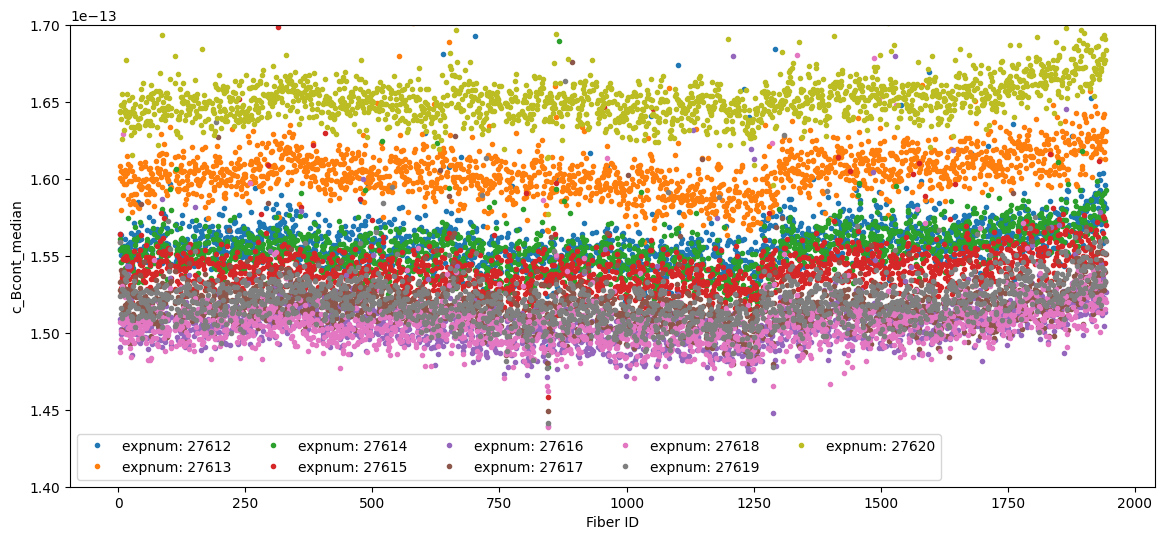

In [162]:
%matplotlib inline
# %matplotlib widget

plt.close()
fig = plt.figure(figsize=(14, 6))
for bright_exposure in bright_exposures:
    tb = tsci[tsci['exposure'] == bright_exposure]
    plt.plot(tb['fiberid'], tb['c_Bcont_median'], marker='.', linestyle='none', label=f"expnum: {bright_exposure}")

plt.xlabel("Fiber ID")
plt.ylabel("c_Bcont_median")
plt.legend(ncols=5)
plt.ylim(1.4e-13, 1.7e-13)

(3.5e-14, 5e-14)

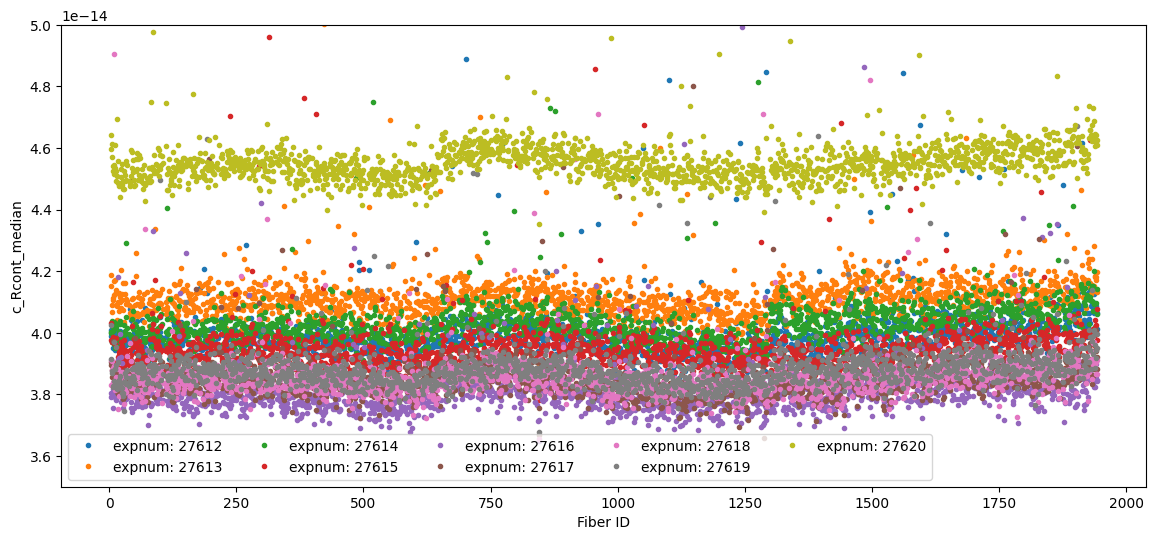

In [163]:
%matplotlib inline
# %matplotlib widget

plt.close()
fig = plt.figure(figsize=(14, 6))
for bright_exposure in bright_exposures:
    tb = tsci[tsci['exposure'] == bright_exposure]
    plt.plot(tb['fiberid'], tb['c_Rcont_median'], marker='.', linestyle='none', label=f"expnum: {bright_exposure}")

plt.xlabel("Fiber ID")
plt.ylabel("c_Rcont_median")
plt.legend(ncols=5)
plt.ylim(3.5e-14, 5e-14)

(1e-14, 1.5e-14)

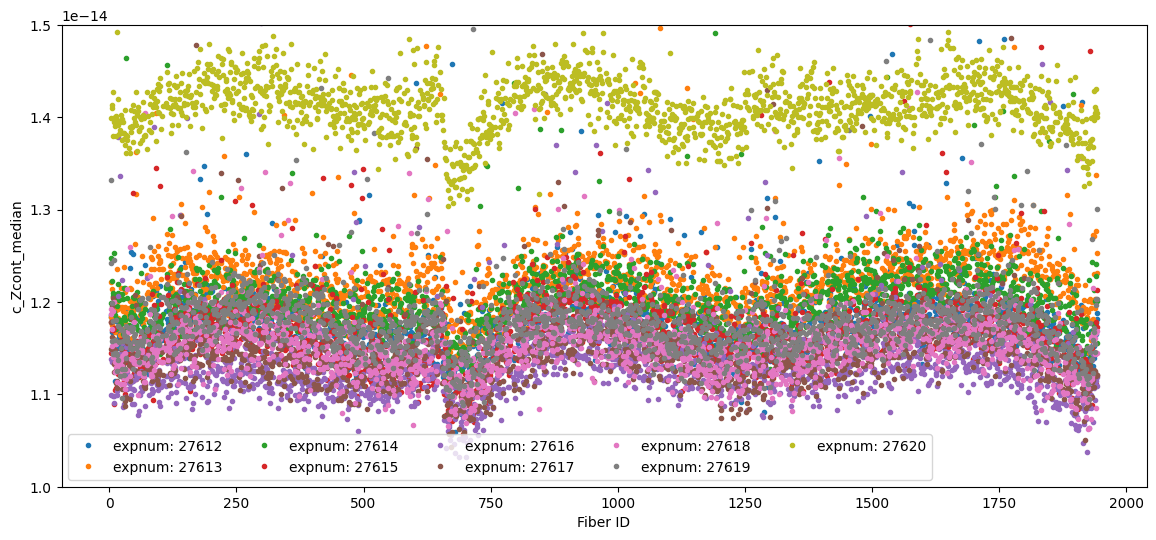

In [164]:
%matplotlib inline
# %matplotlib widget

plt.close()
fig = plt.figure(figsize=(14, 6))
for bright_exposure in bright_exposures:
    tb = tsci[tsci['exposure'] == bright_exposure]
    plt.plot(tb['fiberid'], tb['c_Zcont_median'], marker='.', linestyle='none', label=f"expnum: {bright_exposure}")

plt.xlabel("Fiber ID")
plt.ylabel("c_Zcont_median")
plt.legend(ncols=5)
plt.ylim(1e-14, 1.5e-14)

(1.4e-12, 2e-12)

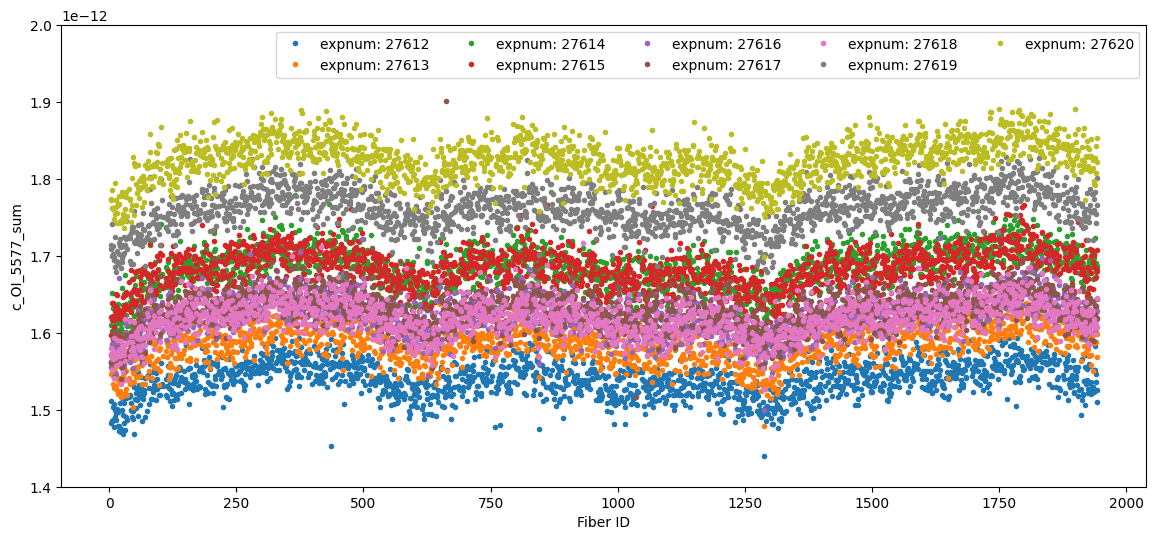

In [165]:
%matplotlib inline
# %matplotlib widget

plt.close()
fig = plt.figure(figsize=(14, 6))
for bright_exposure in bright_exposures:
    tb = tsci[tsci['exposure'] == bright_exposure]
    plt.plot(tb['fiberid'], tb['c_OI_5577_sum'], marker='.', linestyle='none', label=f"expnum: {bright_exposure}")

plt.xlabel("Fiber ID")
plt.ylabel("c_OI_5577_sum")
plt.legend(ncols=5)
plt.ylim(1.4e-12, 2e-12)

(1.7e-12, 2.4e-12)

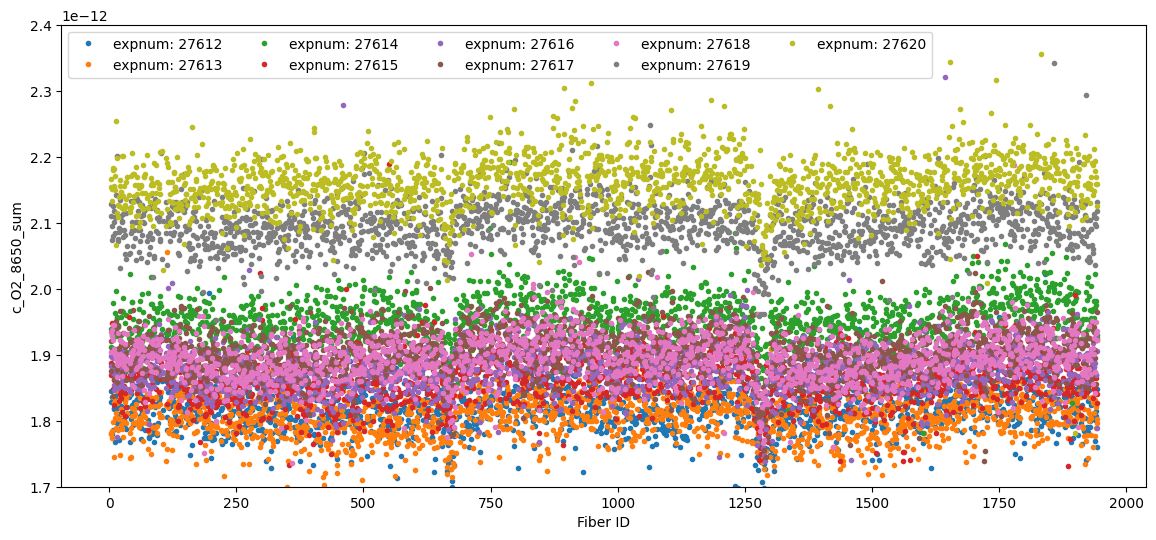

In [137]:
%matplotlib inline
# %matplotlib widget

plt.close()
fig = plt.figure(figsize=(14, 6))
for bright_exposure in bright_exposures:
    tb = tsci[tsci['exposure'] == bright_exposure]
    plt.plot(tb['fiberid'], tb['c_O2_8650_sum'], marker='.', linestyle='none', label=f"expnum: {bright_exposure}")

plt.xlabel("Fiber ID")
plt.ylabel("c_O2_8650_sum")
plt.legend(ncols=5)
plt.ylim(1.7e-12, 2.4e-12)